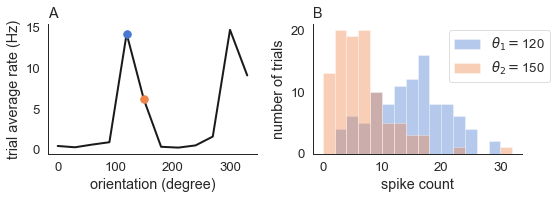

In [49]:
###############################################
## Import packages and specify some settings ##
###############################################
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This makes plots show up and look nice
%matplotlib inline
sns.set(context='paper',style='white',font_scale=1.5,rc={"lines.linewidth":2.5})
sns.set_palette('muted')

# Keep this set to false unless you want to save figures and data
# (in which case you'll need to change some directories below)
SaveFigures=False
###############################################
###############################################


# Load the data from a file
data = np.load('./SpikeCounts1Neuron12Thetas.npz', allow_pickle=True)

# Extract the data from the data dictionary to arrays.
SpikeCounts=data['SpikeCounts']
AllOrientations=data['AllOrientations']
T=data['T']

# Compute rates
Rates=SpikeCounts/T
TrialAvgRates=np.mean(Rates,axis=0)
TrialAvgSpikeCounts=np.mean(SpikeCounts,axis=0)


# Choose two orientations
j1=4
j2=5
theta1=AllOrientations[j1]
theta2=AllOrientations[j2]

# Compute spike counts and rates for each orienation
SpikeCountsOr1=SpikeCounts[:,j1]
SpikeCountsOr2=SpikeCounts[:,j2]
Rate1=TrialAvgRates[j1]
Rate2=TrialAvgRates[j2]


# Make figure
plt.subplots(figsize=(8,3))

plt.subplot(1,2,1)
plt.plot(AllOrientations,1000*TrialAvgRates,'k')
plt.plot(theta1,1000*TrialAvgRates[j1],'.',markersize=15,color=sns.color_palette()[0])
plt.plot(theta2,1000*TrialAvgRates[j2],'.',markersize=15,color=sns.color_palette()[1])
plt.xlabel('orientation (degree)')
plt.ylabel('trial average rate (Hz)')
plt.title('A',loc='left')
sns.despine()

plt.subplot(1,2,2)
bins0=np.arange(0,33,2)
plt.hist(SpikeCountsOr1,bins0,label=r'$\theta_1=$'+str(theta1.astype(int)),color=sns.color_palette()[0],alpha=0.4)
plt.hist(SpikeCountsOr2,bins0,label=r'$\theta_2=$'+str(theta2.astype(int)),color=sns.color_palette()[1],alpha=0.4)
plt.xlabel('spike count')
plt.ylabel('number of trials')
plt.legend(loc=(.65,.55))
plt.title('B',loc='left')
sns.despine()


plt.tight_layout()

# Save figure if needed
if SaveFigures:
    plt.savefig('../Figures/OrientationTuningCurve.pdf')

